## Part A: Conceptual Questions 

1.What is a Decision Tree and how does it make decisions?

A Decision Tree is a supervised machine learning algorithm used for classification and regression that makes decisions by splitting data into smaller subsets based on feature values, forming a tree-like structure where each internal node represents a condition, each branch represents a decision, and each leaf node gives the final prediction.

2.What does a split criterion mean in a Decision Tree?

A split criterion is a mathematical rule used to decide the best feature and value to split the data at each node so that the resulting child nodes are more pure

3.Difference between Gini Impurity and Entropy. 

Gini Impurity measures how often a randomly chosen sample would be misclassified, while Entropy measures the amount of randomness or uncertainty in the data; Gini is faster to compute, whereas Entropy is more theoretically informative but computationally expensive.

4.Why do Decision Trees tend to overfit?

Decision Trees tend to overfit because they keep splitting the data until they perfectly classify training samples, which can make the model too complex and sensitive to noise instead of learning general patterns.

5.What role does the max_depth parameter play?

The max_depth parameter limits how deep the tree can grow, helping to control model complexity, reduce overfitting, and improve generalization by preventing the tree from learning very specific patterns from training data.

## Part B: Data Exploration

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.shape

(1025, 14)

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.duplicated().sum()

np.int64(723)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

## Part C: Data Preprocessing 

In [12]:
X = df.drop('target', axis=1)
y=df['target']
X.shape, y.shape

((302, 13), (302,))

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((241, 13), (61, 13), (241,), (61,))

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt = DecisionTreeClassifier(criterion='gini',random_state=42)
dt

DecisionTreeClassifier(random_state=42)

In [16]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
dt.score(X_train,y_train)

1.0

In [18]:
y_pred = dt.predict(X_test)

In [19]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

Test Accuracy: 0.80


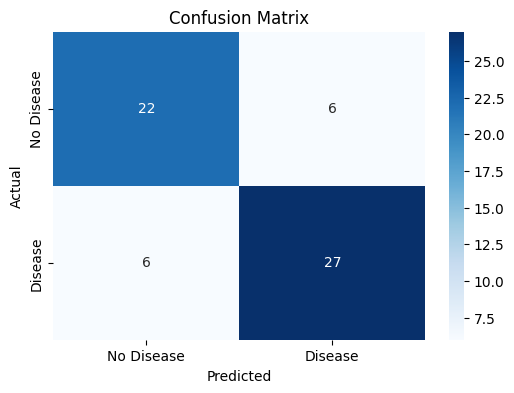


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 3. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [21]:
f1_score(y_test, y_pred)

0.8181818181818182

1.Which class is predicted better? 

Check the f1-score for class 0 and class 1 in the report above. Usually, the class with the higher f1-score is being predicted more accurately by the model.

2.Is the model overfitting or underfitting? 

Overfitting: If your dt.score(X_train, y_train) is 1.00 but your accuracy_score(y_test, y_pred) is significantly lower (e.g., 0.75 - 0.85), the model is overfitting. It has memorized the training set but cannot generalize to new data.

Underfitting: If both scores are low, the model is underfitting (unlikely for a default Decision Tree).

## Part F: Understanding Tree Depth (Manual Experiment)

In [22]:
# List of depths to experiment with
depths = [2, 5, None]
results = []

for depth in depths:
    # 1. Initialize and train the model
    model = DecisionTreeClassifier(max_depth=depth, criterion='gini', random_state=42)
    model.fit(X_train, y_train)
    
    # 2. Calculate accuracies
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    # 3. Store results
    results.append({
        'Max Depth': 'None' if depth is None else depth,
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc
    })

# Display as a Table
results_df = pd.DataFrame(results)
print(results_df)

  Max Depth  Training Accuracy  Testing Accuracy
0         2           0.784232          0.655738
1         5           0.941909          0.770492
2      None           1.000000          0.803279


1.What happens when the tree is very shallow?

When the tree is very shallow (low max_depth), the model becomes too simple, may fail to capture important patterns in the data, and often results in underfitting with low accuracy on both training and test data.

2.What happens when the tree is very deep?

When the tree is very deep (high max_depth), the model learns even minor details and noise from the training data, which leads to overfitting, showing very high training accuracy but poorer performance on unseen test data.

3.Which model performs best and why?

The model with an optimal (moderate) tree depth performs best because it balances bias and variance, captures meaningful patterns without memorizing noise, and provides good generalization on both training and test datasets.

### Part G: Tree Visualization 

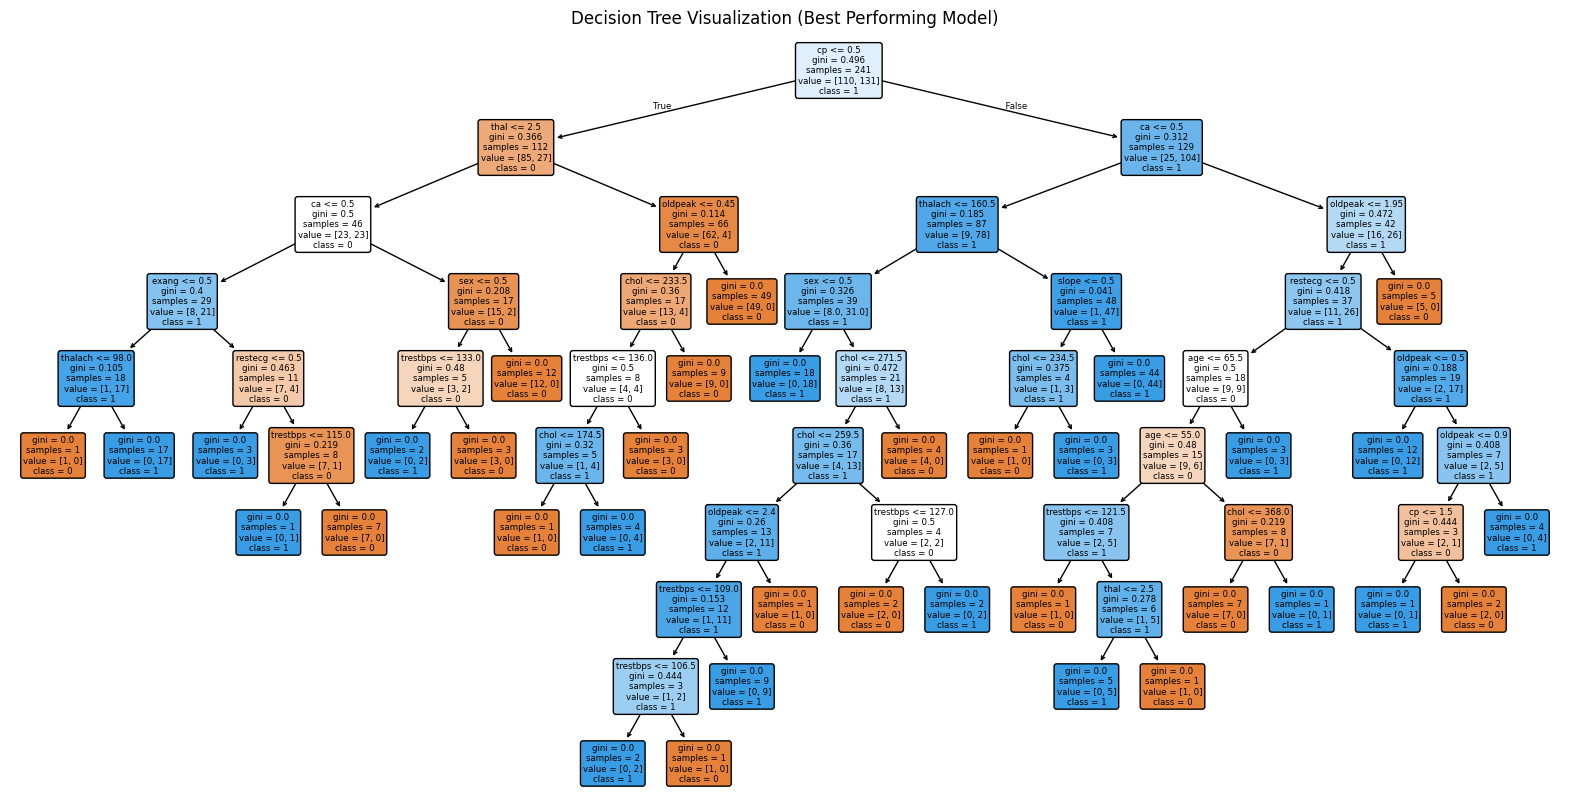

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=[str(c) for c in dt.classes_],
    filled=True,
    rounded=True
)

plt.title("Decision Tree Visualization (Best Performing Model)")
plt.show()


1.Why are Decision Trees suitable for medical datasets?

Decision Trees are suitable for medical datasets because they handle both numerical and categorical data, work well with non-linear relationships, require minimal data preprocessing, and provide clear decision rules that doctors can easily understand and trust.

2.What makes Decision Trees easy to interpret?

Decision Trees are easy to interpret because their tree-like structure shows decisions as simple if-else rules, allowing users to trace predictions step by step from the root node to the leaf node.

3.Why are Decision Trees commonly used in ensemble methods?

Decision Trees are commonly used in ensemble methods because they are fast to train, handle different data types well, and when combined in large numbers, they reduce overfitting and improve prediction accuracy.

#### Finally Check with these below parameter 

● Compare criterion='gini' vs criterion='entropy' 

● Try min_samples_leaf manually 

● Write a short conclusion 

● Proper markdown explanations required

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Gini model
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
gini_acc = accuracy_score(y_test, y_pred_gini)

# Entropy model
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
entropy_acc = accuracy_score(y_test, y_pred_entropy)

print("Accuracy with Gini:", gini_acc)
print("Accuracy with Entropy:", entropy_acc)


Accuracy with Gini: 0.8032786885245902
Accuracy with Entropy: 0.7213114754098361


In [28]:
leaf_values = [1, 5, 10, 20]

for leaf in leaf_values:
    model = DecisionTreeClassifier(
        criterion='gini',
        min_samples_leaf=leaf,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"min_samples_leaf = {leaf} → Accuracy = {acc}")


min_samples_leaf = 1 → Accuracy = 0.8032786885245902
min_samples_leaf = 5 → Accuracy = 0.7868852459016393
min_samples_leaf = 10 → Accuracy = 0.8032786885245902
min_samples_leaf = 20 → Accuracy = 0.6229508196721312


##### Observations
- Gini and Entropy produce similar accuracy, but Gini is computationally faster.
- Lower values of min_samples_leaf allow the tree to grow deeper, which may cause overfitting.
- Higher values of min_samples_leaf reduce overfitting but may lead to underfitting if too large.
- A moderate min_samples_leaf value gives better generalization.


### Conclusion
The Decision Tree model performs best when a balanced set of hyperparameters is used. 
While both Gini and Entropy criteria produce comparable results, Gini is preferred due to faster computation.
Tuning the min_samples_leaf parameter helps control overfitting and improves model generalization.
Overall, a moderately complex tree provides the best performance on unseen data.
